In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df = pd.read_csv('employee data.csv')

# A. Exploratory Data Analysis(EDA)

In [3]:
#checking top rows of df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#checking data structure of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#checking info of attrition which is our main variable of interest
df['Attrition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition
Non-Null Count  Dtype 
--------------  ----- 
1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [6]:
#checking some description parameters of df
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
pd.set_option('display.max_columns', None)  # Set the option to display all columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## A.1 EDA for categorical variables

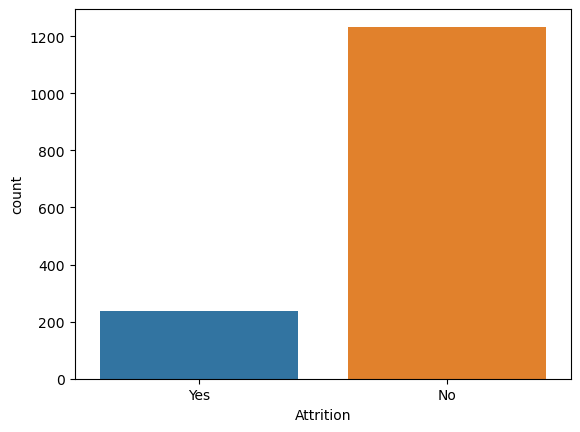

In [8]:
#seeing the employee range based on target column attrition
sn.countplot(x='Attrition', data=df)
plt.show()
#takeaway: 

In [9]:
#Checking values in Attrition column
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
#Converting Yes and No values into 1 and 0 for easy operation later
df['Attrition']=df['Attrition'].map({'Yes':1, 'No':0})

In [11]:
#crosschecking attrition column
df['Attrition'].unique()

array([1, 0], dtype=int64)

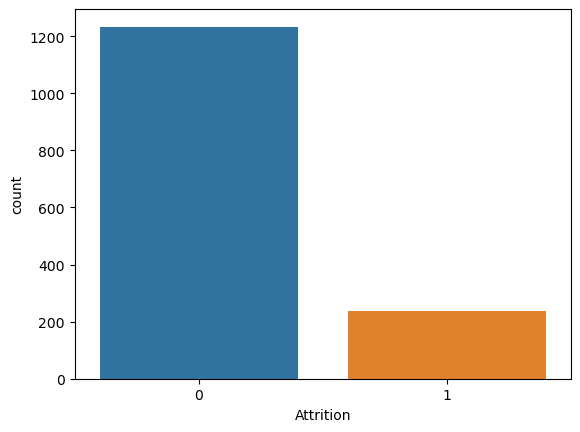

In [12]:
#Replotting: 
#seeing the employee range based on target column attrition
sn.countplot(x='Attrition', data=df)
plt.show()
#key takeway: about 300 employees have left the company and majority of them (about 1200) have remained.

In [13]:
#changing these values into 0, 1 and 2 for Non-Travel, Travel_Rarely and Travel_Frequently respectively
df['BusinessTravel']=df['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

<Axes: xlabel='BusinessTravel', ylabel='count'>

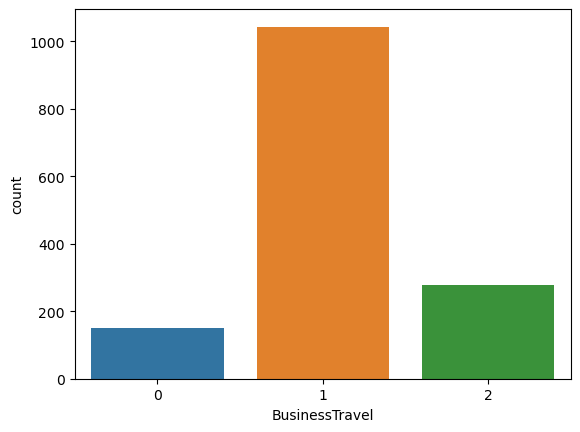

In [14]:
sn.countplot(x='BusinessTravel', data=df)
#takeaway: More employees travel rarely followed by those who travel frequently and least number of employees do not travel. 

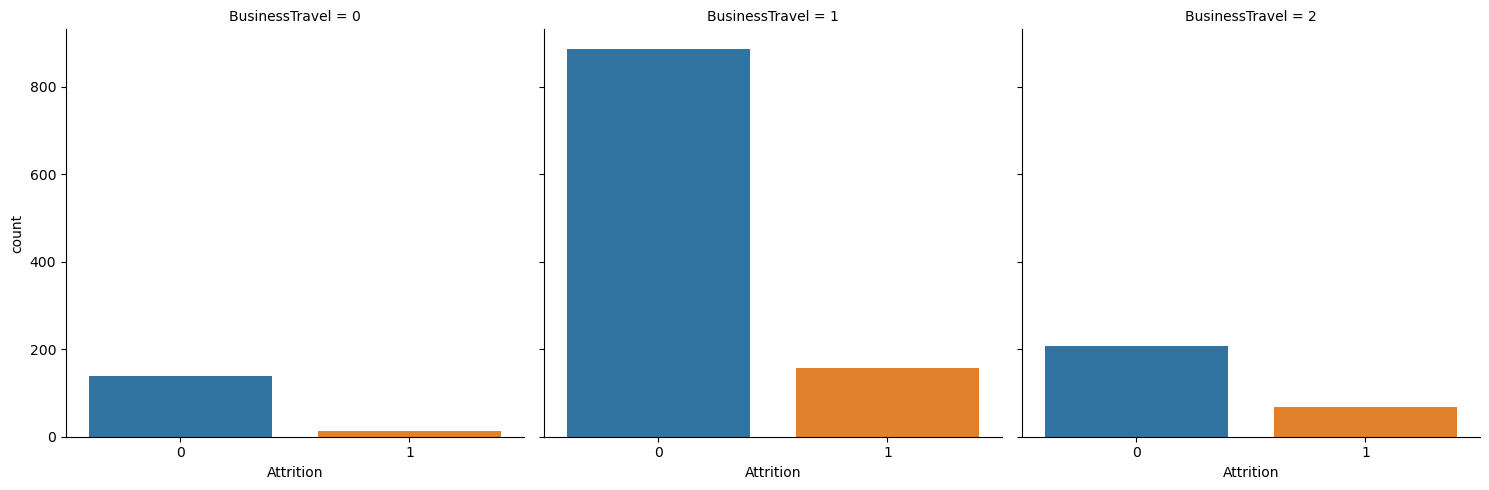

In [15]:
#feature Attrition split over feature BusinessTravel
sn.catplot(x='Attrition', col='BusinessTravel', kind='count', data=df)
#Takeaway: Those employees who travel frequently seem to have more attrition. 

<Axes: xlabel='Department', ylabel='count'>

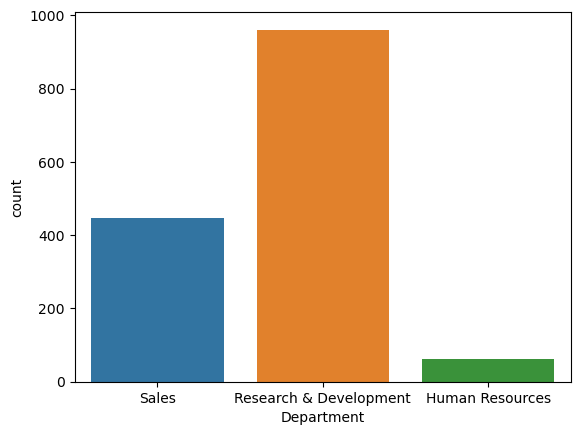

In [16]:
sn.countplot(x='Department', data=df)
#takeaway: More employees in Research and Development followed by Sales and Human Resources. 

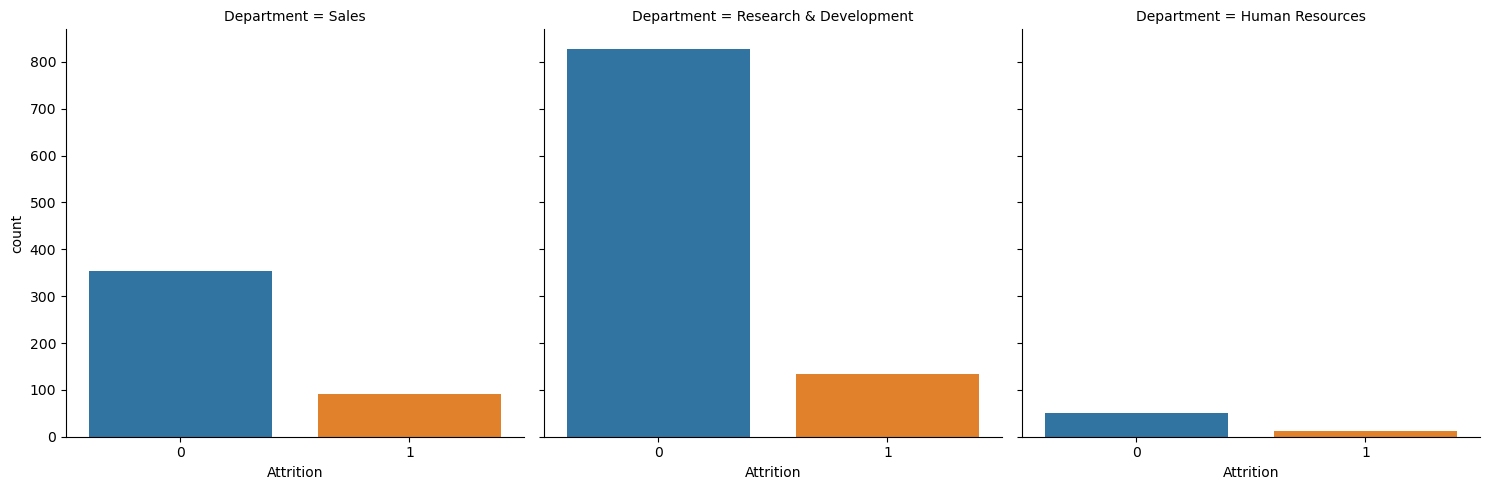

In [17]:
#feature Attrition split over feature Department
sn.catplot(x='Attrition', col='Department', kind='count', data=df)
#Takeaway:more attrition seen in R and D department by number. 

<Axes: xlabel='EducationField', ylabel='count'>

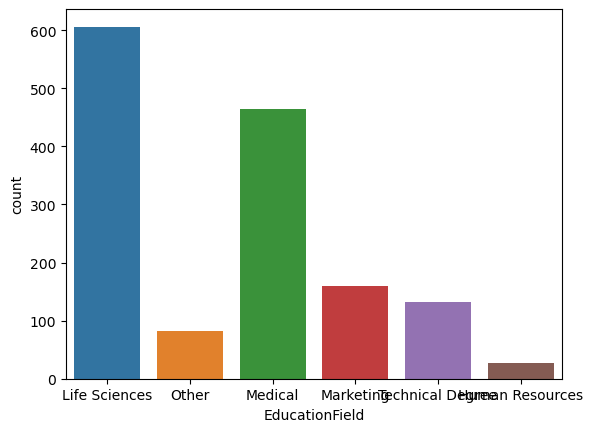

In [18]:
sn.countplot(x='EducationField', data=df)
#takeaway: Largest number of employees from field of life science background.

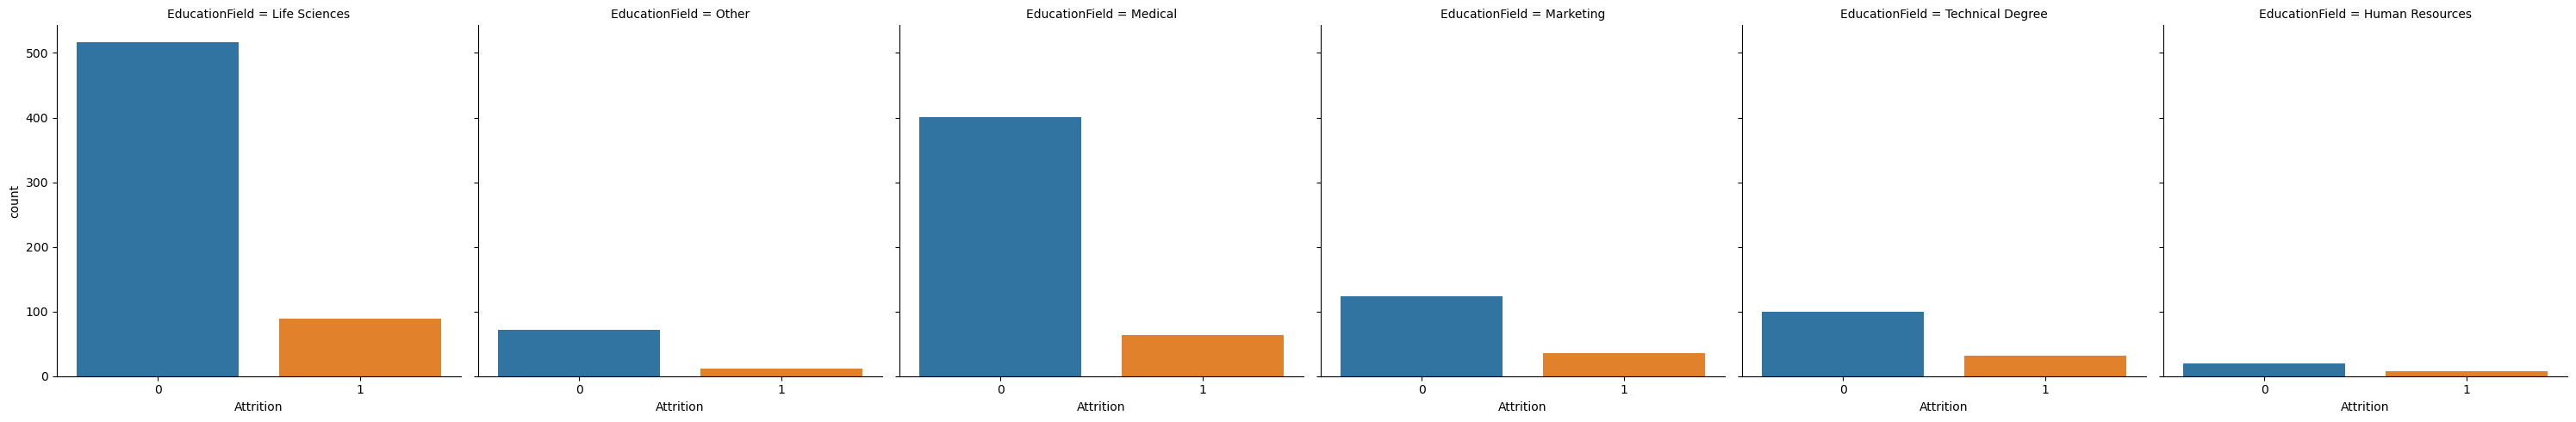

In [19]:
#feature Attrition split over feature EducationField
sn.catplot(x='Attrition', col='EducationField', kind='count', data=df)
#Takeaway: more attrition from life sciences background by number. 

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

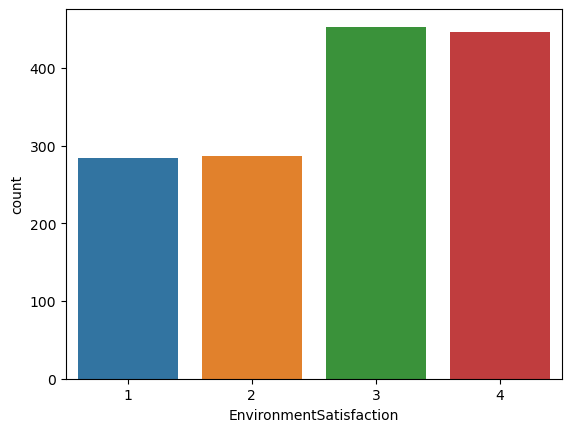

In [20]:
sn.countplot(x='EnvironmentSatisfaction', data=df)
#takeaway: Largest number of employees are satisfied from the work environment.

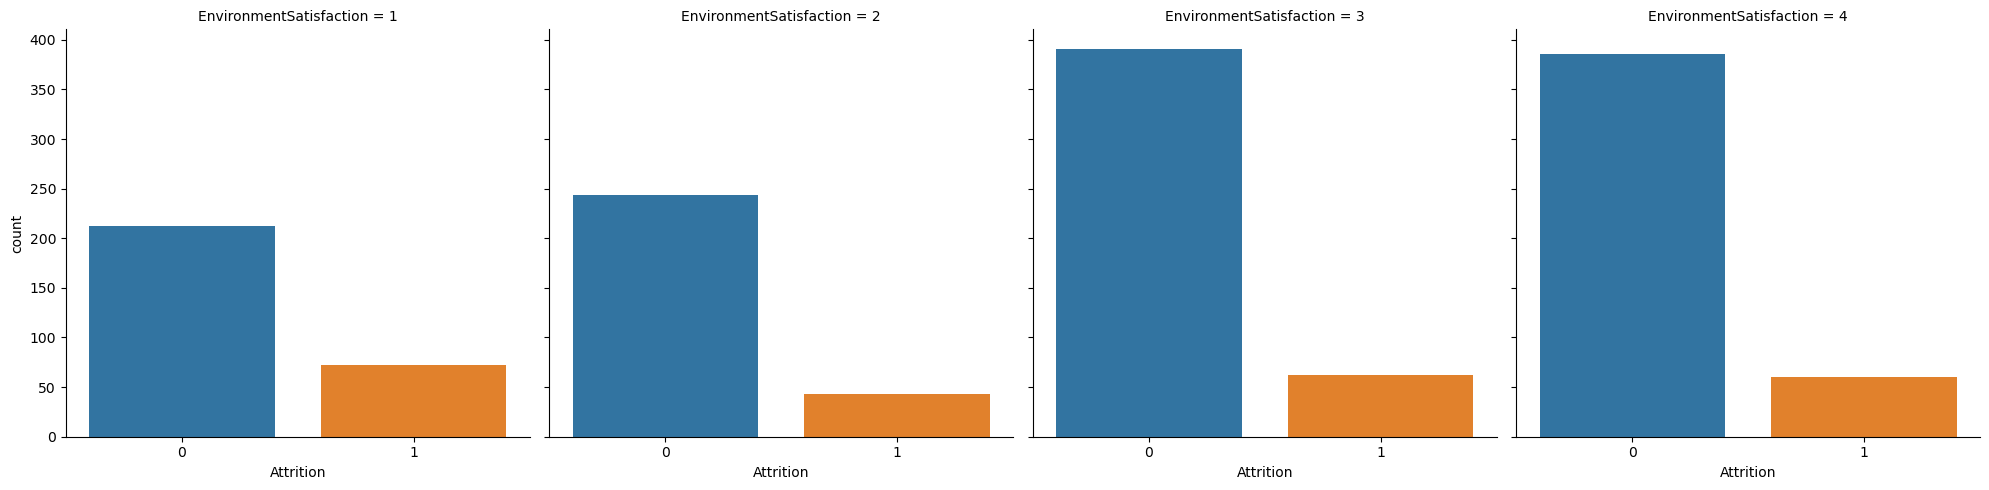

In [21]:
#feature Attrition split over EnvironmentSatisfaction
sn.catplot(x='Attrition', col='EnvironmentSatisfaction', kind='count', data=df)
#Takeaway: more attrition from less satisfied employees by number. 

<Axes: xlabel='OverTime', ylabel='count'>

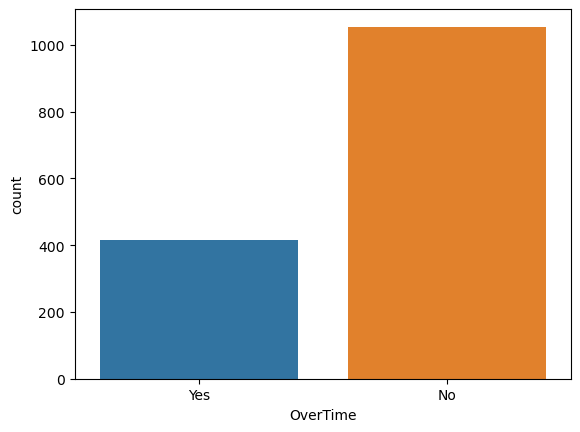

In [22]:
sn.countplot(x='OverTime', data=df)

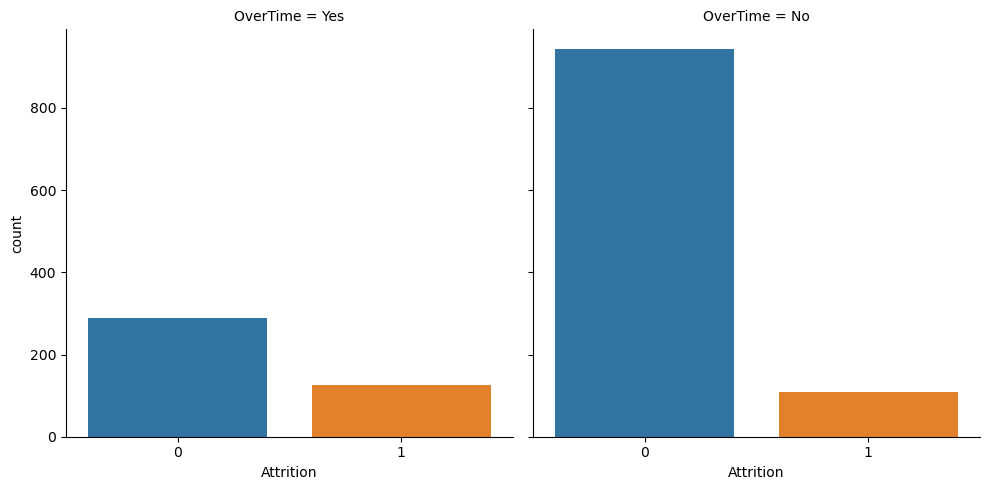

In [23]:
sn.catplot(x='Attrition', col='OverTime', kind='count', data=df)
#keytakeaway: Employee attrition seen more in employees who work overtime even though those
#Who work overtime is less. 

<Axes: xlabel='PerformanceRating', ylabel='count'>

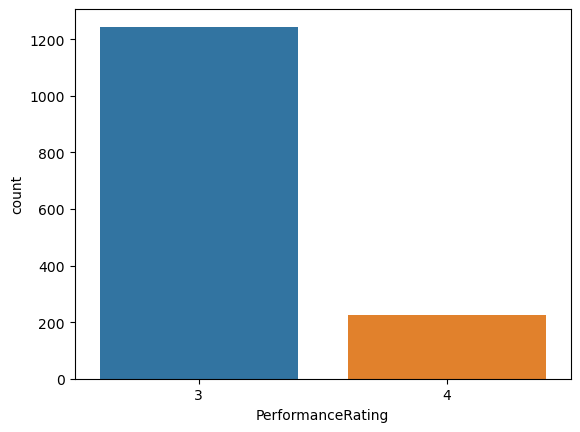

In [24]:
sn.countplot(x='PerformanceRating', data=df)
#most of the employees have performance rating of 3 by 4

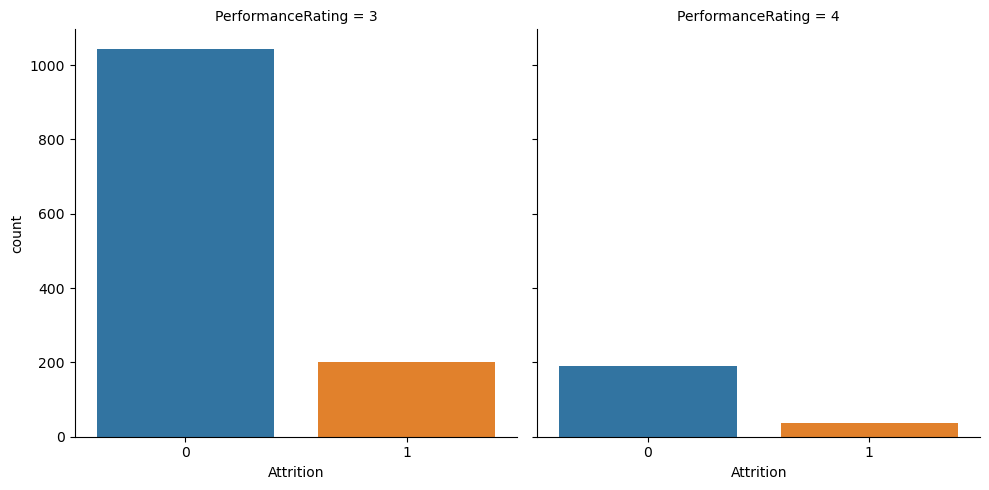

In [25]:
sn.catplot(x='Attrition', col='PerformanceRating', kind='count', data=df)
#keytakeaway:More attrition by 3 rated employees.

<Axes: xlabel='StockOptionLevel', ylabel='count'>

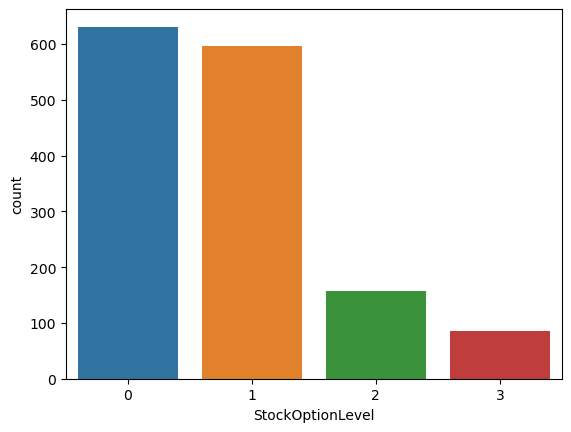

In [26]:
sn.countplot(x='StockOptionLevel', data=df)
#takaway: More number of those who belong to 0 stockoptionlevel

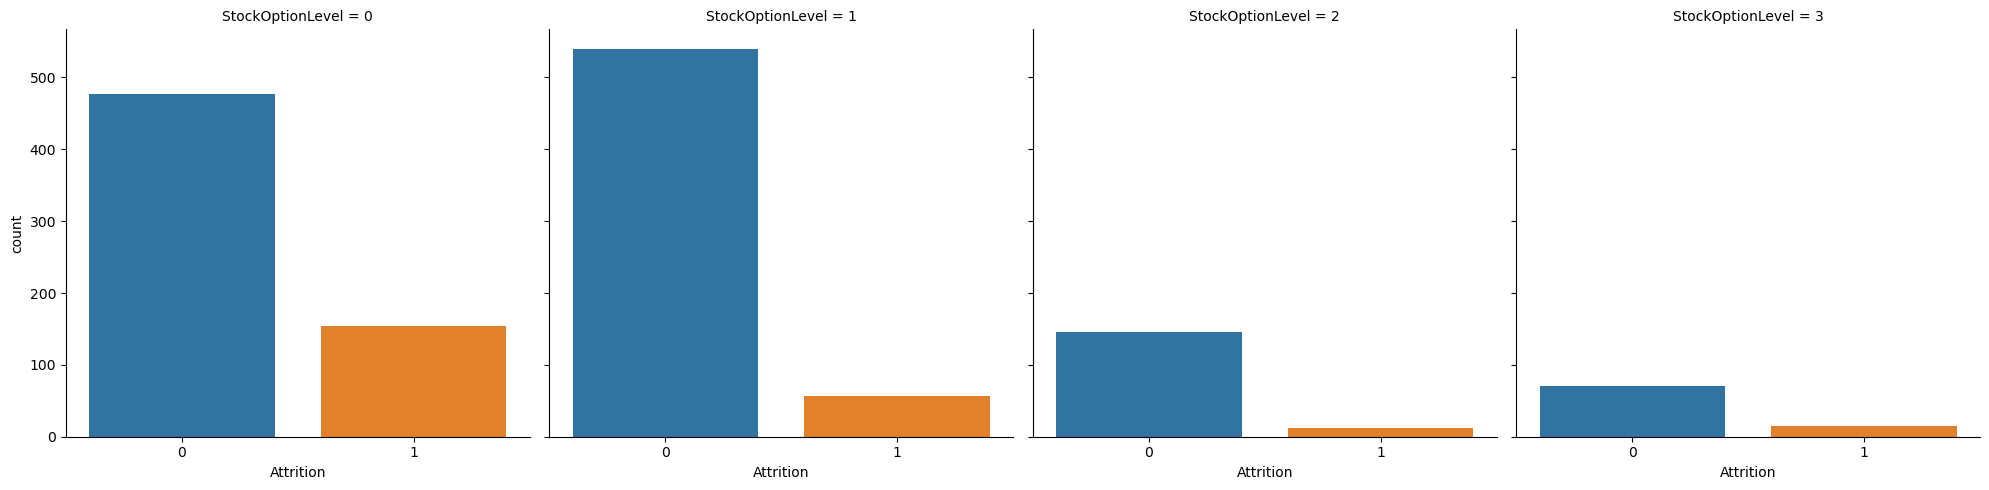

In [27]:
sn.catplot(x='Attrition', col='StockOptionLevel', kind='count', data=df)
#keytakeaway:More attrition by 0 stock option employees.

<Axes: xlabel='TrainingTimesLastYear', ylabel='count'>

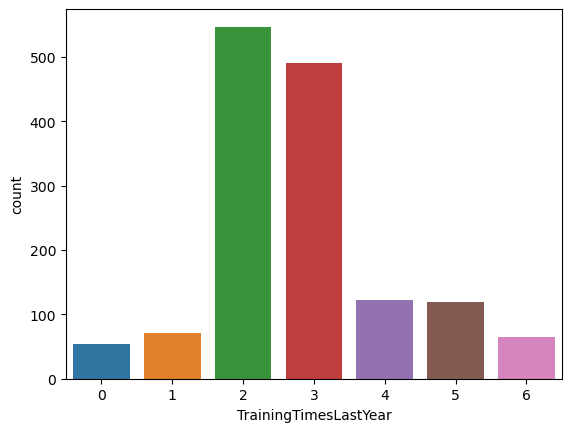

In [28]:
sn.countplot(x='TrainingTimesLastYear', data=df)
#takeaway: majority of them had 2-3 training tmes last year

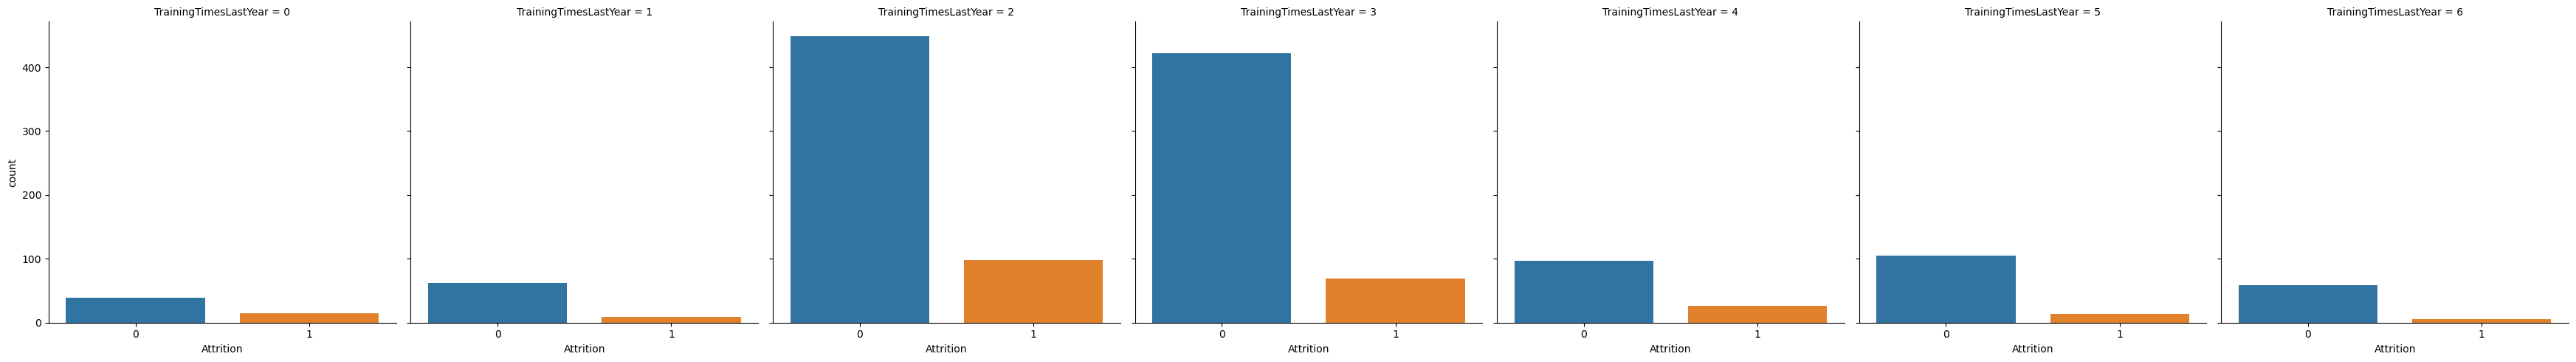

In [29]:
sn.catplot(x='Attrition', col='TrainingTimesLastYear', kind='count', data=df)
#takeaway: more attrition by count of those employees who had 2 trainings last year. 

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

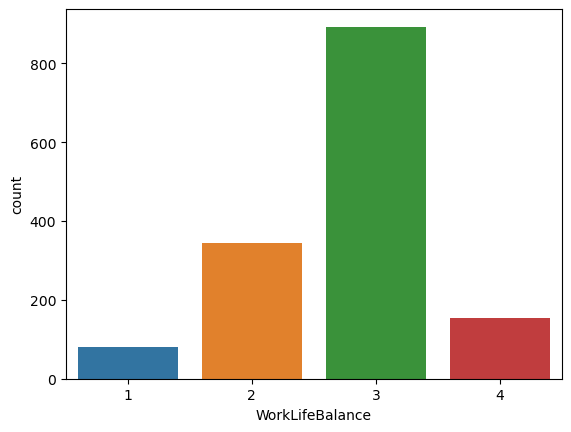

In [30]:
sn.countplot(x='WorkLifeBalance', data=df)

<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

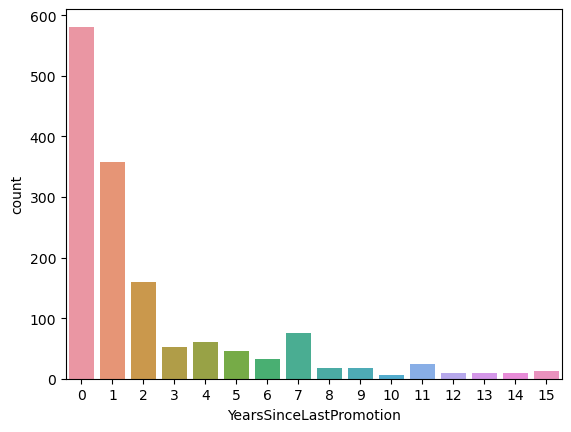

In [31]:
sn.countplot(x='YearsSinceLastPromotion', data=df)
#takeaway: most of them are promoted once a year

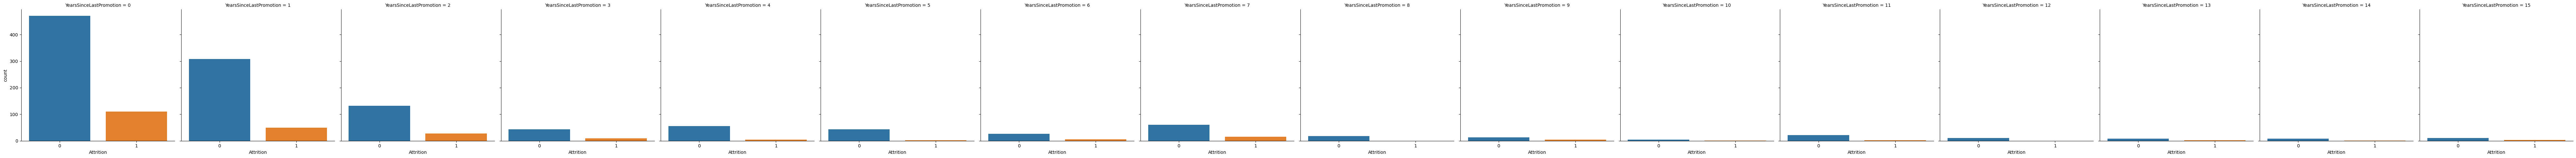

In [32]:
sn.catplot(x='Attrition', col='YearsSinceLastPromotion', kind='count', data=df)
#takeaway: Fresh non promoted employees leave more in number. 

<Axes: xlabel='YearsWithCurrManager', ylabel='count'>

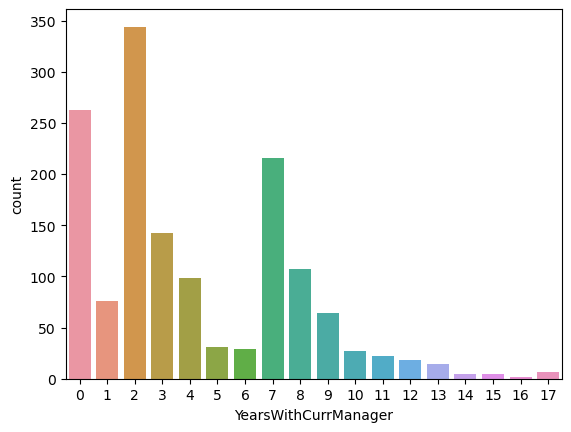

In [33]:
sn.countplot(x='YearsWithCurrManager', data=df)

## A2. EDA for numerical variables


<Axes: xlabel='Age', ylabel='Density'>

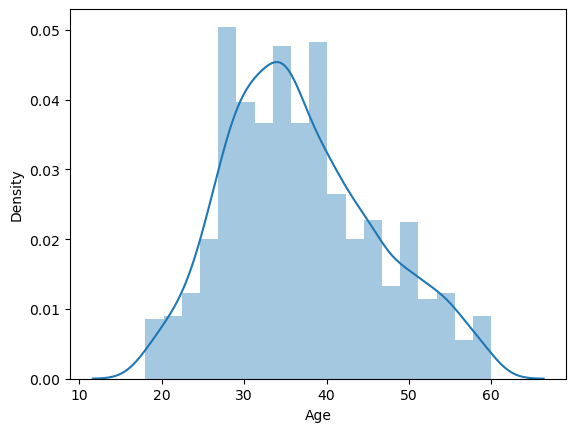

In [34]:
#Age: Plotting a univariate distribution of Age 
sn.distplot(df['Age'])
#takeaway: Almost follows normal distribution starting at 18 and ending on 60 with maximum emoployees of age around 30. 

<Axes: xlabel='Attrition', ylabel='Age'>

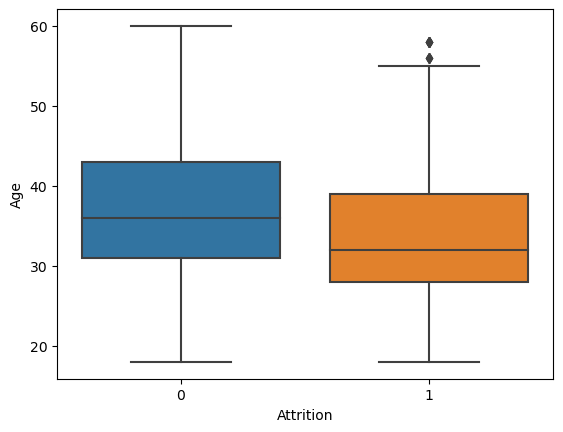

In [35]:
#boxplot to show distribution with respect to categories
sn.boxplot(x='Attrition', y='Age', data=df)
#takeaway: Comparatively younger employees from late twenties to late thirties are leaving. 

<Axes: xlabel='DailyRate', ylabel='Density'>

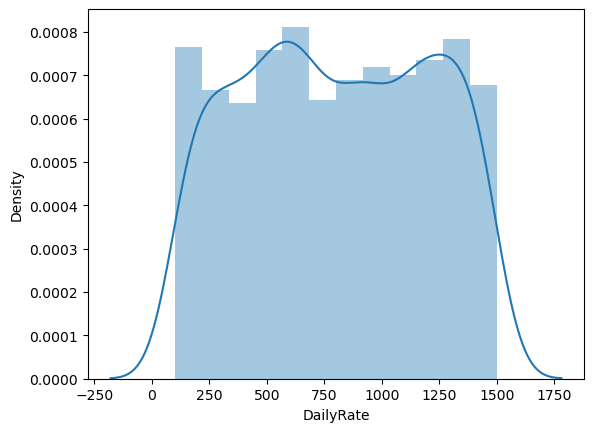

In [36]:
sn.distplot(df['DailyRate'])
#takeaway: daily rate ranging from 100 to 1500. Majority made around 600 daily.

<Axes: xlabel='Attrition', ylabel='DailyRate'>

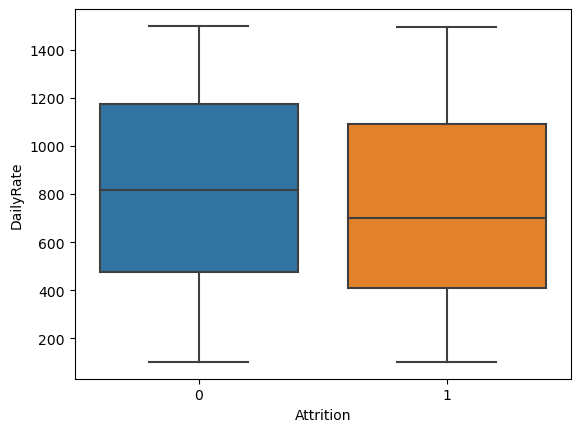

In [37]:
sn.boxplot(x='Attrition', y='DailyRate', data=df)
#those who left have relatively lower daily rate than who stayed

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

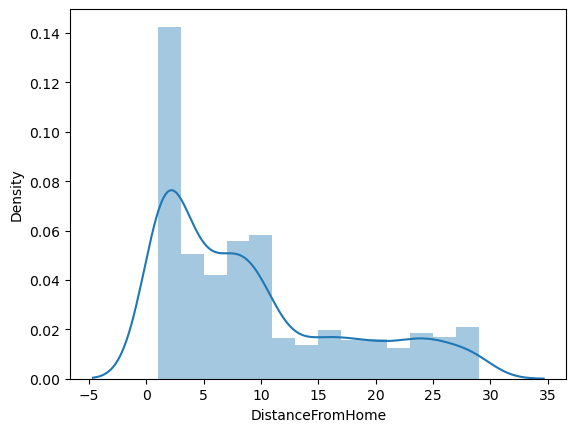

In [38]:
sn.distplot(df['DistanceFromHome'])
#takewaway: most of them have their office at 1-2km from their home. 

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

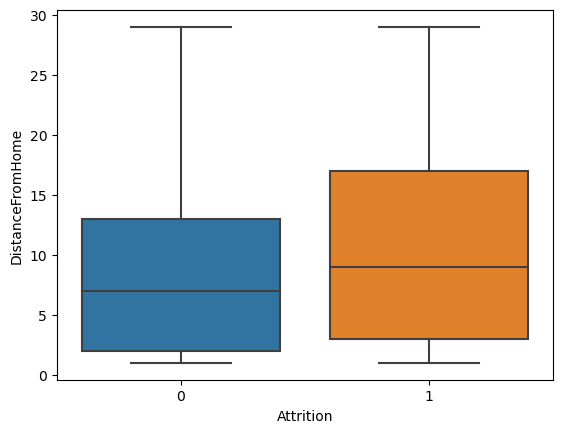

In [39]:
sn.boxplot(x='Attrition', y='DistanceFromHome', data=df)
#those who left had larger distance of office from home. 

In [40]:
#deleted column EmployeeCount and EmployeeNumber
df.drop(columns=['EmployeeCount'], inplace=True)
df.drop(columns=['EmployeeNumber'], inplace=True)

<Axes: xlabel='JobInvolvement', ylabel='Density'>

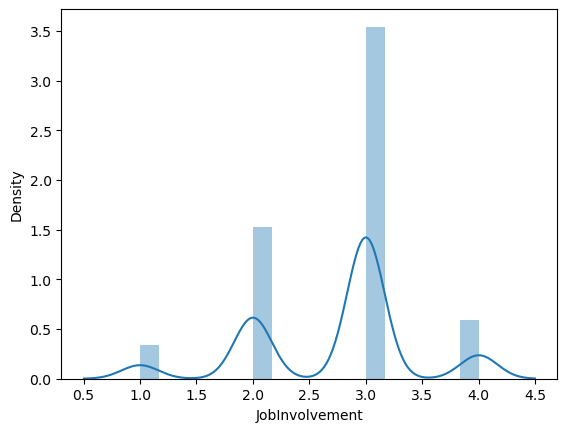

In [41]:
sn.distplot(df['JobInvolvement'])
#larger number of employees fall under above average status in terms of job involvement

<Axes: xlabel='Attrition', ylabel='JobInvolvement'>

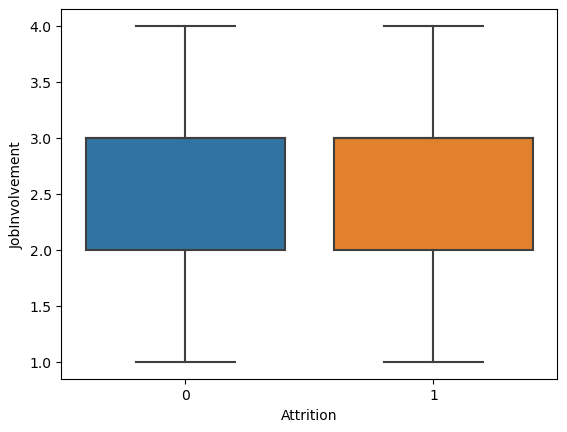

In [42]:
sn.boxplot(x='Attrition', y='JobInvolvement', data=df)
#takeaway:no visible difference seen. 


<Axes: xlabel='JobLevel', ylabel='Density'>

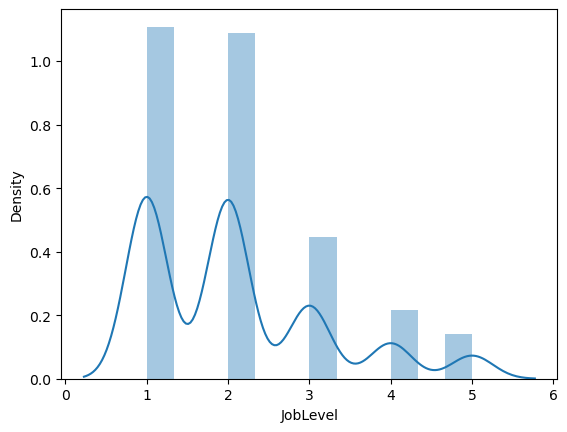

In [43]:
sn.distplot(df['JobLevel'])
#takeaway: majority have job level of 1 and 2 

<Axes: xlabel='Attrition', ylabel='JobLevel'>

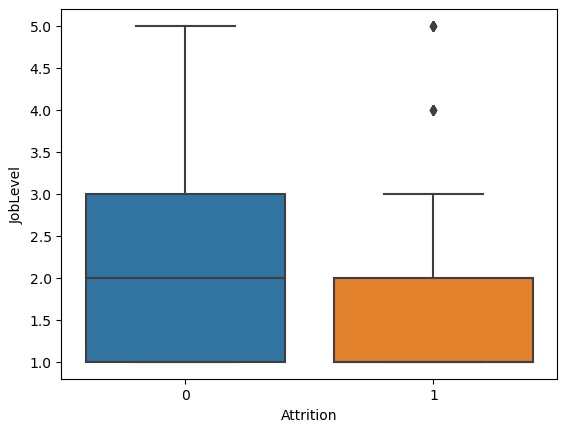

In [44]:
sn.boxplot(x='Attrition', y='JobLevel', data=df)
#Majority of them who left have lower job level. Some outliers present with 4 and 5 job level. 

<Axes: xlabel='MaritalStatus', ylabel='count'>

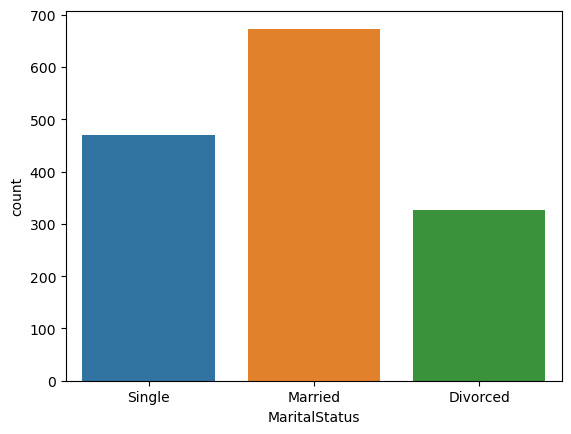

In [45]:
sn.countplot(x='MaritalStatus', data=df)

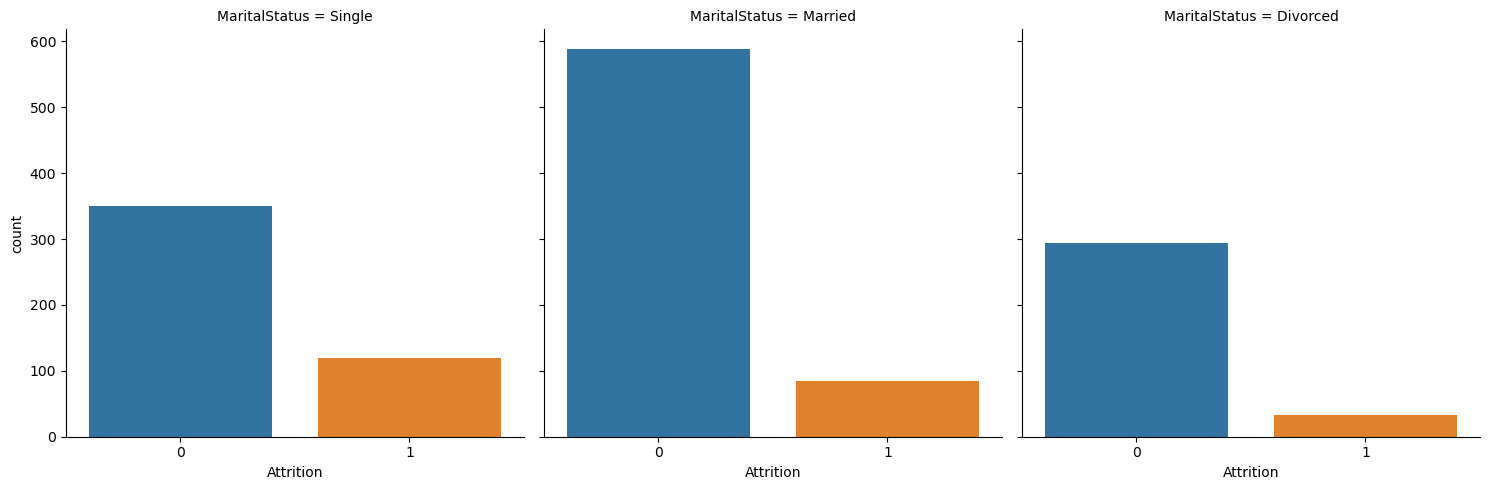

In [46]:
sn.catplot(x='Attrition', col='MaritalStatus', kind='count', data=df)
#takeaway: Single employees left the job more in number in comparison to married and divorced

<Axes: xlabel='MonthlyIncome'>

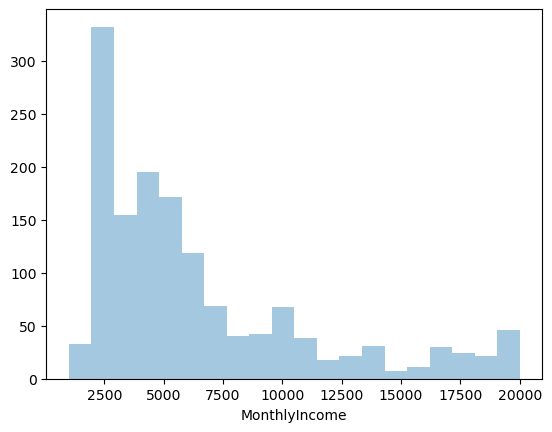

In [47]:
sn.distplot(df['MonthlyIncome'], kde=False)
#large number of employees have monthly income around 2500

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

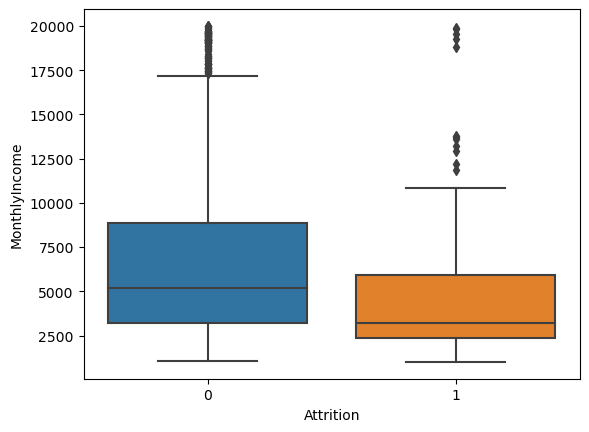

In [48]:
sn.boxplot(x='Attrition',y='MonthlyIncome', data=df)
#takeaway: more number of people who left had lower monthly income

<Axes: xlabel='NumCompaniesWorked'>

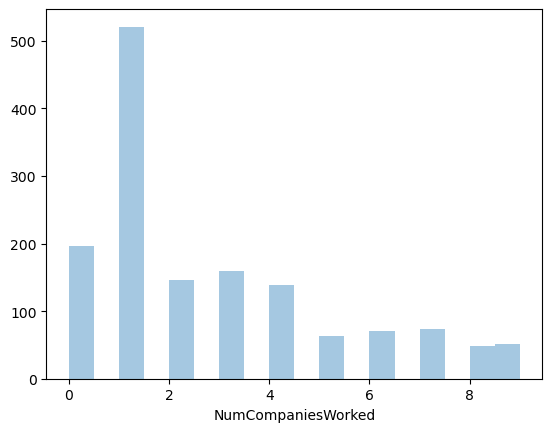

In [49]:
sn.distplot(df['NumCompaniesWorked'], kde=False)
#takeaway:large number worked for 1 company

<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

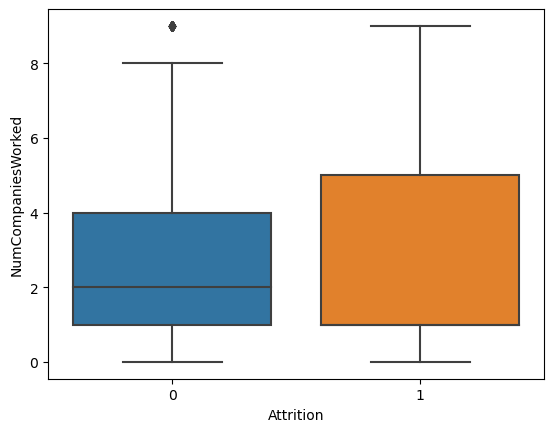

In [50]:
sn.boxplot(x='Attrition',y='NumCompaniesWorked', data=df)
#takeaway: larger number of employees who left had worked for more than one company. 

<Axes: xlabel='PercentSalaryHike'>

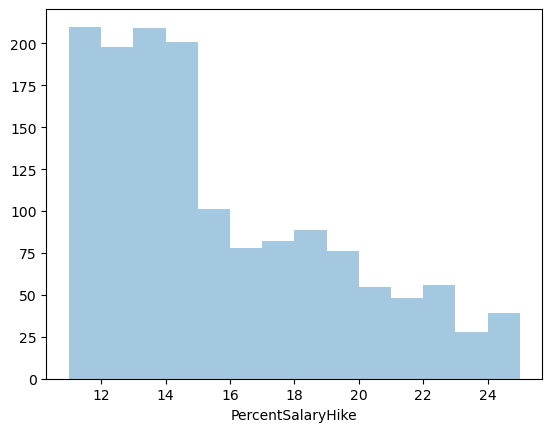

In [51]:
sn.distplot(df['PercentSalaryHike'], kde=False)
#takeaway:large number had salary hike of 12% or 14% 

<Axes: xlabel='Attrition', ylabel='PercentSalaryHike'>

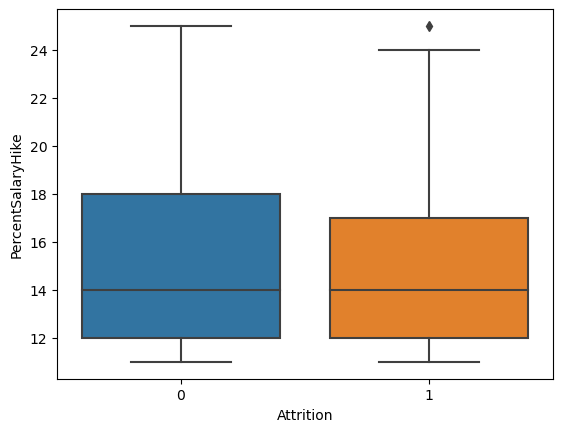

In [52]:
sn.boxplot(x='Attrition',y='PercentSalaryHike', data=df)
#takeaway:not very conclusive 

In [53]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<Axes: xlabel='TotalWorkingYears'>

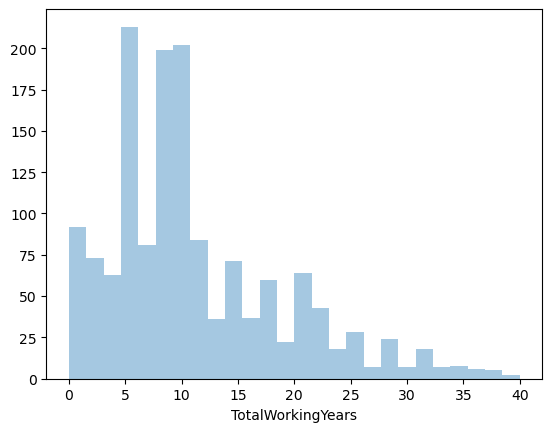

In [54]:
sn.distplot(df['TotalWorkingYears'], kde=False)
#large number of employees have 5, and 8-12 working years

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

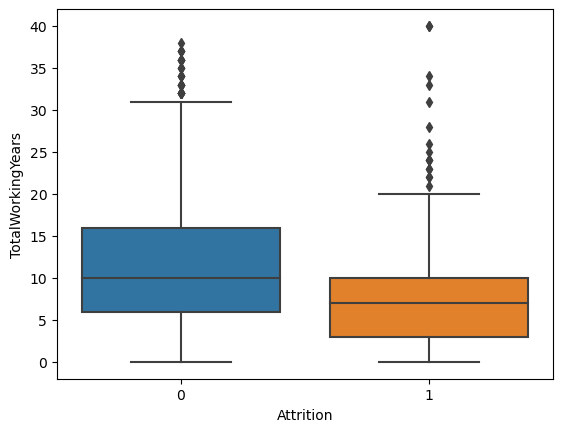

In [55]:
sn.boxplot(x='Attrition', y= 'TotalWorkingYears', data=df)
#takeaway: larger number of employees who left had lesser work experience. 

<Axes: xlabel='YearsAtCompany'>

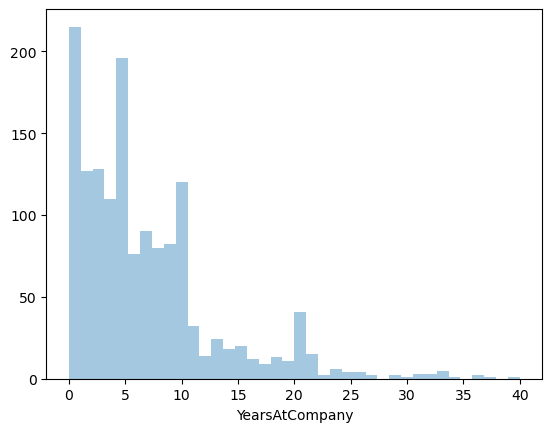

In [56]:
sn.distplot(df['YearsAtCompany'], kde=False)
#large number of employees have spent 0-10 years working for the company. 

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

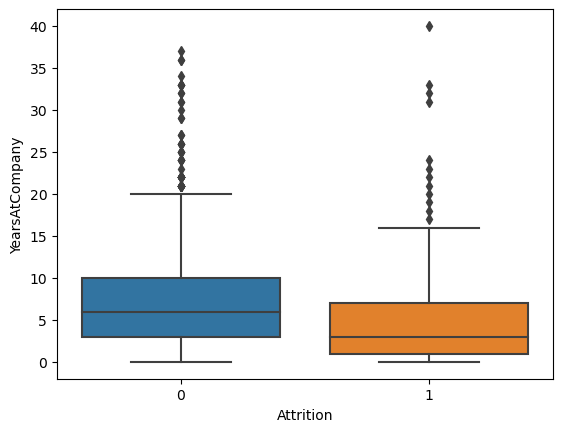

In [57]:
sn.boxplot(x='Attrition', y= 'YearsAtCompany', data=df)
#takeaway: larger number of employees who left had lesser working period in the company. 

<Axes: xlabel='YearsWithCurrManager'>

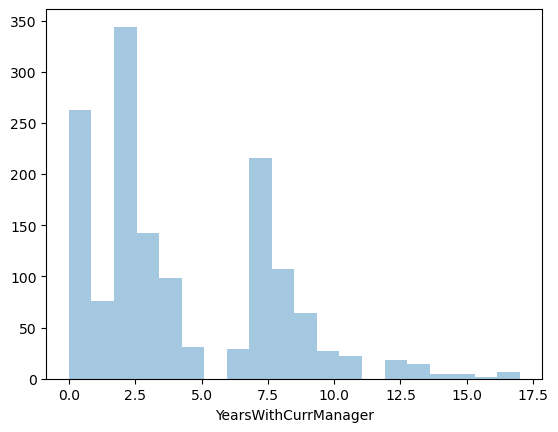

In [58]:
sn.distplot(df['YearsWithCurrManager'], kde=False)
#large number of employees have spent 2.5 years working for the same manager. 

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

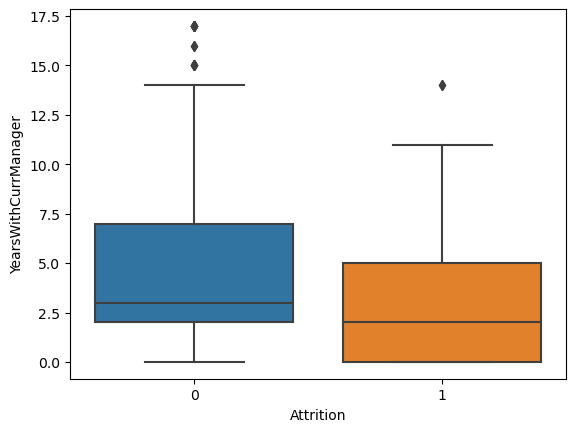

In [59]:
sn.boxplot(x='Attrition', y= 'YearsWithCurrManager', data=df)
#takeaway: larger number of employees who left had lesser working period with the current manager. 

In [60]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [61]:
df2= df.drop(columns=['Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Over18'])

In [62]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


<Axes: >

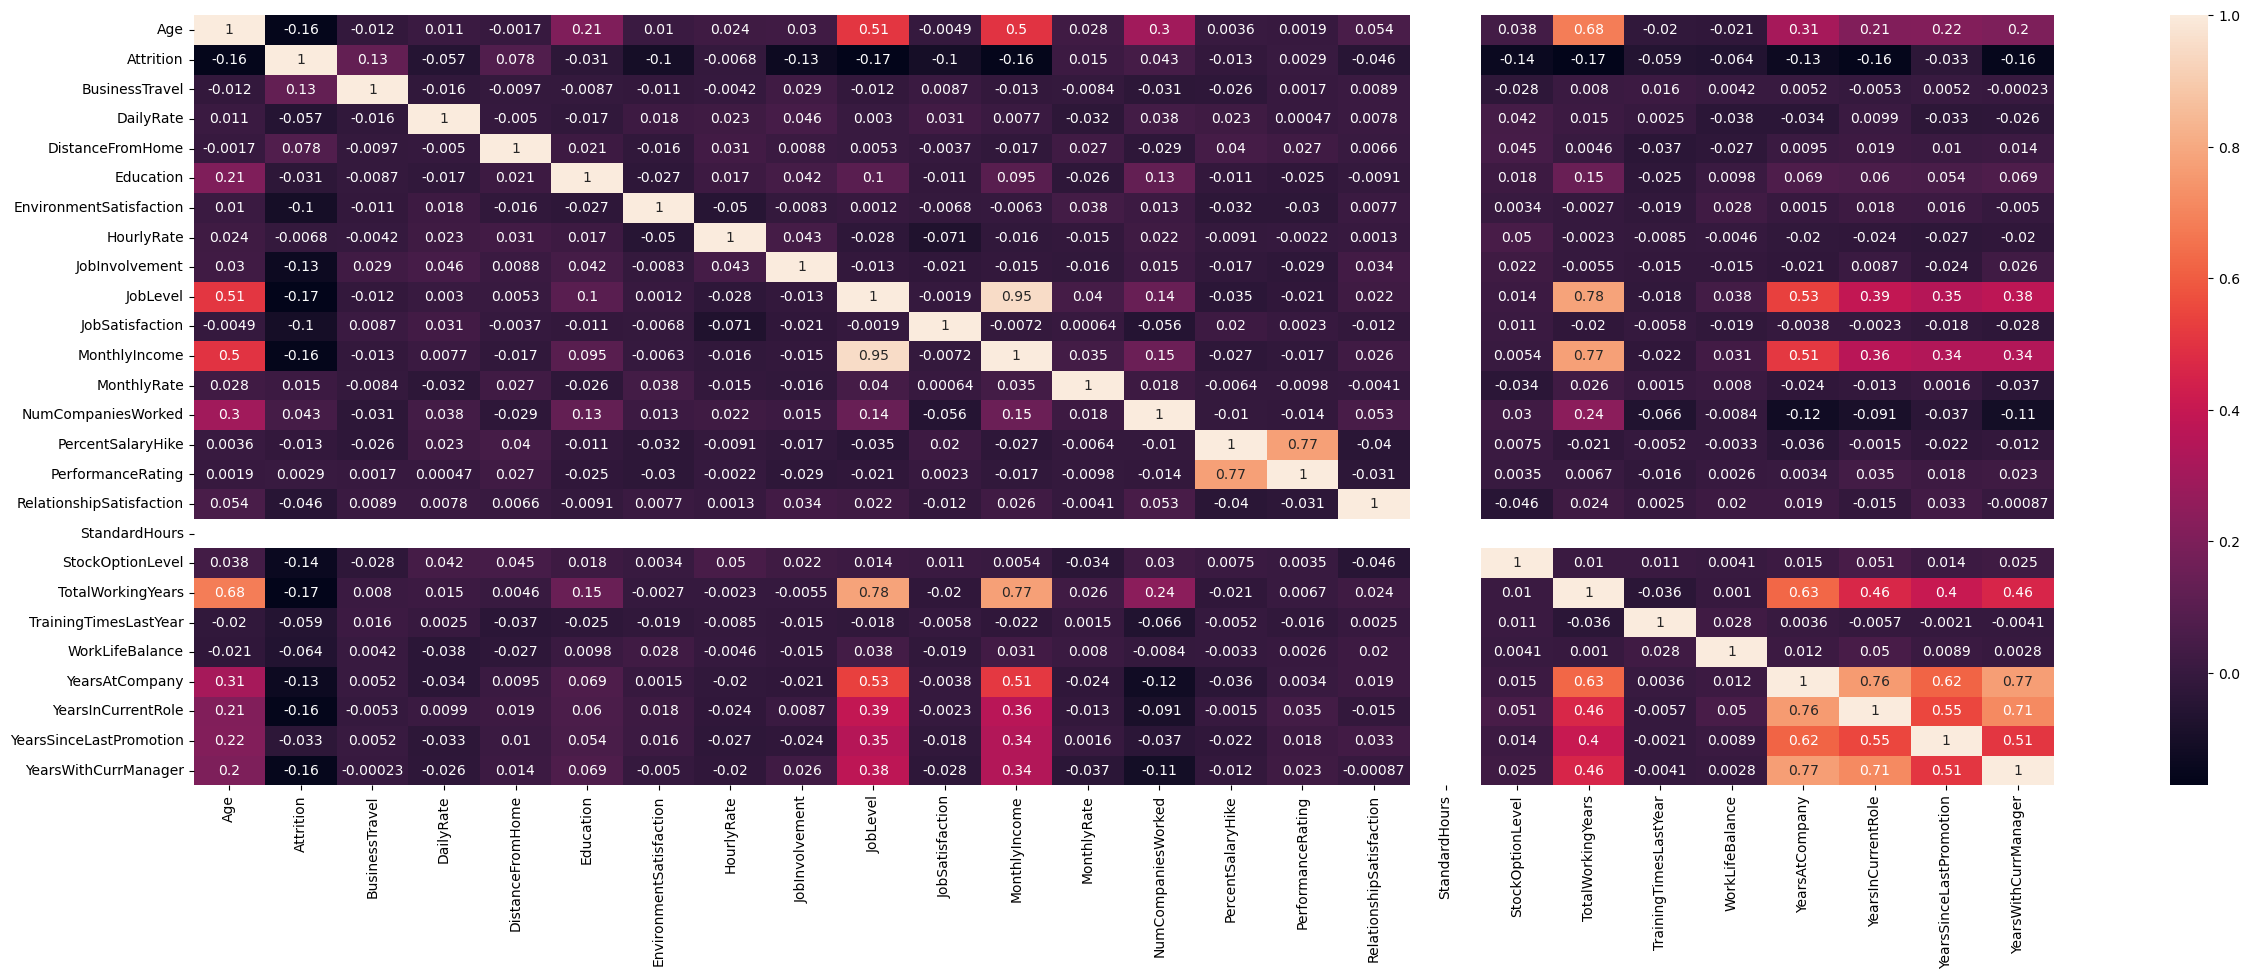

In [63]:
cor_mat=df2.corr()
fig= plt.figure(figsize=(30,10))
sn.heatmap(cor_mat, annot=True)

# B. Model Selection

## B.1 Feature Engineering

In [64]:
#checking the dataset
df2.shape

(1470, 26)

In [65]:
#removing unnecessary columns 
df2.drop(['StandardHours'], axis=1, inplace=True)

In [66]:
#rechecking the new dataset
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [67]:
#handling missing values
df2.isnull().sum()
#takeaway: There are no missing values to replace

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## B.2 Splitting dataset into training set and test set

In [68]:
#split dataset into features and labels
X = df2.drop(['Attrition'], axis=1)
y= df2['Attrition']

In [69]:
#split dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

In [70]:
#Cheking length of X_train and X_test
len(X_train)


1176

In [71]:
len(X_test)

294

## B.3 Model Selection

In [72]:
#Trying to use the below models which are RandomForestClassifier and XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
#create parameter
model_params = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],  # Number of trees in the forest
            'criterion': ['gini', 'entropy'],  # Criterion for splitting
            'max_depth': [None, 10, 20],       # Maximum depth of the tree
            'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
            'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
            'max_features': ['auto', 'sqrt'],   # Number of features to consider when looking for the best split
            'bootstrap': [True, False],         # Whether bootstrap samples are used when building trees
            'random_state': [42]                # Random seed for reproducibility
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],   # Number of boosting rounds
            'max_depth': [3, 5, 7],             # Maximum depth of the tree
            'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage used in update to prevent overfitting
            'subsample': [0.8, 1.0],            # Subsample ratio of the training instances
            'colsample_bytree': [0.8, 1.0],     # Subsample ratio of columns when constructing each tree
            'gamma': [0, 1, 5],                 # Minimum loss reduction required to make a further partition on a leaf node of the tree
            'reg_alpha': [0, 0.1, 0.5],         # L1 regularization term on weights
            'reg_lambda': [0, 0.1, 0.5],        # L2 regularization term on weights
            'random_state': [42]                # Random seed for reproducibility
        }
    }
}

scores = []
best_parameters = {}

# Iterate over each model
for model_name, model_dict in model_params.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model_dict['model'], param_grid=model_dict['params'], cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X, y)
    
    # Get the best score
    best_score = grid_search.best_score_
    
    # Get the best parameters
    best_params = grid_search.best_params_
    best_parameters[model_name] = best_params
    
    # Append the best score to the scores list
    scores.append((model_name, best_score))
    
    # Print results
    print(f"Best cross-validation accuracy for {model_name}: {best_score}")
    print(f"Best parameters for {model_name}: {best_params}\n")

# Print final scores and best parameters
print("Final Scores:")
for model_name, score in scores:
    print(f"{model_name}: {score}")

print("\nBest Parameters:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")

# C. Model Building

In [74]:
#As per the above results, XGBoost gives the best result so we select XGBoost for model building
model_xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 3, n_estimators = 100)

In [75]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
model_xgb.score(X_train, y_train)

0.9158163265306123

In [77]:
X_test[4:5]

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1332,29,2,459,24,2,4,73,2,1,4,2439,14753,1,24,4,2,0,1,3,2,1,0,1,0


In [78]:
#predicting the value of 5th row of a column
model_xgb.predict(X_test[4:5])

#takeaway: In this way we can put fill variables for new employee and predict whether the employee will leave or not. 

array([1])

In [79]:
df2.loc[1332]

Age                            29
Attrition                       1
BusinessTravel                  2
DailyRate                     459
DistanceFromHome               24
Education                       2
EnvironmentSatisfaction         4
HourlyRate                     73
JobInvolvement                  2
JobLevel                        1
JobSatisfaction                 4
MonthlyIncome                2439
MonthlyRate                 14753
NumCompaniesWorked              1
PercentSalaryHike              24
PerformanceRating               4
RelationshipSatisfaction        2
StockOptionLevel                0
TotalWorkingYears               1
TrainingTimesLastYear           3
WorkLifeBalance                 2
YearsAtCompany                  1
YearsInCurrentRole              0
YearsSinceLastPromotion         1
YearsWithCurrManager            0
Name: 1332, dtype: int64

In [80]:
#checking confusion matrix because it is a classification problem.

#confusion matrix gives the count of true values with respect to the predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_xgb.predict(X_test))
cm


#Key Takeaways:  


#For '0' values (employee not leaving), the model predicted 10 false values for every 235 true values.

#Similarly, in case of '1' values (employee leaving), the model predcited 40 false values for every 9 true values. 

#So, either the model needs tuning to increase the accuracy for predicting employees churning or the data collection
#should be more accurate. 

array([[235,  10],
       [ 40,   9]], dtype=int64)

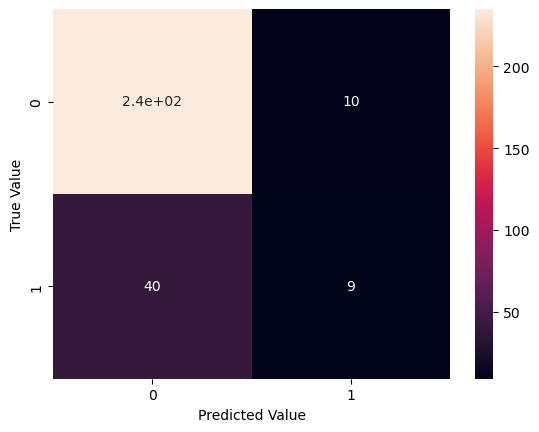

In [81]:
#visualizing confusion matrix in the form of heatmap
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [82]:
#We got very low accuracy for prediction of employees leaving(1). It might be due to inbalance in sample size along with other
#reasons. So, we first try to balance the sample (1:1) for employees left and employees stayed. After that we will re-run the model.


In [83]:
left = df[df['Attrition']==1]
stayed = df[df['Attrition']==0]
